this is an outline notebook- sections are suggested steps, but more or less steps can be followed to reach your end goal

# Regression problem -  predicting real estate prices in USD


#### Background: 
You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

#### Objective: 
The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses which have the greatest impact on price, eg. understanding which factors are responsible for the highest property values - USD650K and above. 

#### Data: 
The data set consists of information on some 22,000 properties.  The dataset consisted of historic data for houses sold between May 2014 to May 2015. 

#### Definitions 
These are the definitions of data variables provided: (Note: For some of the variables that are self explanatory, no definition has been provided)

+ Id: Unique identification number for the property.
+ date: date the house was sold.
+ price: price of the house.
+ waterfront: house which has a view to a waterfront.
+ condition: How good the condition is (overall). 1 indicates worn out property and 5 excellent.
+ view: does the property have a view? and of what quality?
+ grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
+ Sqft_above: square footage of house apart from basement.
+ Sqft_living15: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
+ Sqft_lot15: lotSize area in 2015(implies - some renovations).

#### Exploring the data
We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. 
To explore the data, you can use the techniques such as data profiling packages, Tableau ad hoc analysis, or any other EDA method including describe, info, sumna, using matplotlib and seaborn for distribution and correlation visualisations.

The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then proceed to data pre-processing (scaling numerical variables and encoding categorical variables). 

#### Model
You may use different models to compare the accuracies and find the model that best fits your data. Since this is a regression problem (predicting a value), you can use linear regression, KNN, tree based regression models. You can use the measures of accuracies that have been discussed in class. 

Please note that while comparing different models, make sure you use the same measure of accuracy as a benchmark and the appropriate metrics for that model- see the sklearn documentation for details.



### import libraries 

In [1]:
#numpy and pandas, matplotlib and seaborn, scipy, sklearn model and metrics 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### read data as a pandas data frame, preview top 10 rows

In [2]:
df = pd.read_excel("Real_Estate.xls")

In [3]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### EDA - exploratory data analysis - get to know the data 

We are particularly keen to understand the data types (and if those data types are appropriate), if there are any null, 0 or missing values, if the meaning of each feature is clear and the data is all clean and usable, if any new useful features could be created - such as creating buckets of values from columns, what relationships can we perceive between features, do we have any duplicates (check the ID column), if any outliers seem unreasonable/extreme and could be removed, if any columns might reasonably be dropped

Note down every identified cleaning, wrangling or pre processing task that could be attempted at this stage or later in your notebook 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
import pandas_profiling

In [7]:
#df.profile_report()

In [8]:
df.shape

(21597, 21)

In [9]:
# Duplicates?
df.duplicated().sum() # duplicates of full rows

0

In [10]:
df["id"].value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [11]:
(df["id"].value_counts()>1).sum() # how many IDs are duplicated?

176

In [12]:
# Duplicate analysis - is it valid and should I keep it?
df[df["id"] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [13]:
# Check if any properties were sold on the same date
duplicate_rows_df = df[df.duplicated(["id", "date"])]

In [14]:
duplicate_rows_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [15]:
df["date"].min()

Timestamp('2014-05-02 00:00:00')

In [16]:
df["date"].max()

Timestamp('2015-05-27 00:00:00')

In [17]:
df["condition"].unique()

array([3, 5, 4, 1, 2])

In [18]:
df[df["bedrooms"] == 33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


Some info on number of bathrooms:

* 0.25: only a toilet
* 0.5: toilet and sink
* 0.75: toilet, sink and a shower or tub but not both

In [19]:
df[df["bathrooms"] == 8]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,12050,27600,2.5,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
12764,1225069038,2014-05-05,7,8.0,13540,307752,3.0,0,4,3,...,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000


In [20]:
df[df["grade"] == 13]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
4407,2470100110,2014-08-04,5,5.75,9200,35069,2.0,0,0,3,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000
4807,9831200500,2015-03-04,5,3.75,6810,7500,2.5,0,0,3,...,6110,700,1922,0,98102,47.6285,-122.322,2660,7500,2480000
5446,7237501190,2014-10-10,4,3.25,4890,13402,2.0,0,0,3,...,4890,0,2004,0,98059,47.5303,-122.131,5790,13539,1780000
6035,1725059316,2014-11-20,4,4.00,6330,13296,2.0,0,2,3,...,4900,1430,2000,0,98033,47.6488,-122.201,2200,9196,2390000
7028,853200010,2014-07-01,5,5.50,7050,42840,1.0,0,2,4,...,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570,3800000
7245,6762700020,2014-10-13,6,8.00,12050,27600,2.5,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
7900,1068000375,2014-09-23,6,5.00,7100,18200,2.5,0,0,3,...,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477,3200000
9245,9208900037,2014-09-19,6,7.75,9890,31374,2.0,0,4,3,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
10362,3303850390,2014-12-12,5,5.50,7400,18898,2.0,0,3,3,...,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442,2980000
13398,2426039123,2015-01-30,5,4.75,7880,24250,2.0,0,2,3,...,7880,0,1996,0,98177,47.7334,-122.362,2740,10761,2420000


In [21]:
df[df["yr_built"] == 1900]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
14,1175000570,2015-03-12,5,2.00,1810,4850,1.5,0,0,3,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,530000
115,3626039325,2014-11-21,3,3.50,4380,6350,2.0,0,0,3,...,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,740500
498,9274202270,2014-08-18,2,1.50,1490,5750,1.5,0,0,4,...,1190,300,1900,0,98116,47.5872,-122.390,1590,4025,625000
537,5694500105,2014-12-04,2,2.00,1510,4000,1.0,0,0,4,...,1010,500,1900,0,98103,47.6582,-122.345,1920,4000,595000
703,7011200260,2014-12-19,4,2.00,1400,3600,1.0,0,0,3,...,1100,300,1900,0,98119,47.6385,-122.370,1630,2048,485000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19048,1702901340,2014-06-13,3,2.00,2910,6600,2.0,0,0,4,...,1920,990,1900,1988,98118,47.5576,-122.281,1370,5500,718500
19122,3388110230,2014-07-29,4,1.75,1790,7175,1.5,0,0,3,...,1410,380,1900,0,98168,47.4963,-122.318,1790,8417,179000
19304,4083302225,2014-10-14,4,3.00,2550,3784,1.5,0,0,4,...,1750,800,1900,0,98103,47.6559,-122.338,2100,4560,850000
19370,2420069042,2015-04-24,3,2.00,1553,6550,1.0,0,0,3,...,1553,0,1900,2001,98022,47.2056,-121.994,1010,10546,240000


### histograms or boxplots

1) identify how much rescaling might be needed and if any outliers or skewing will be a problem, per every numerical column. Remember that linear regression doesnt perform well with highly skewed data so normalisation method would be needed. 

2) bar charts for each categorical column to see the range and spread of that data too - remembering that linear regression requires all numeric data points for the training data set, we would have to later use OHE / get_dummies to convert categories. If we have too many unique values, is there a rationale for grouping them and therefore saving redundant columns?

Some ideas on rescaling / normalizing the distribution:

- remove the outliers?
- convert outliers into categories (e.g. very expensive house)
- split the data into columns for bimodal distributions

Drop ID, consider dropping lat/long (don't rescale these columns)

In [22]:
#df.hist(figsize = (18,15), bins = "auto");

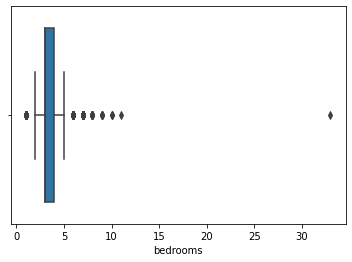

In [23]:
ax = sns.boxplot(x = df["bedrooms"])

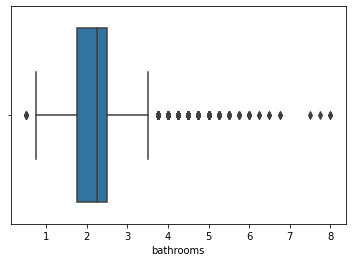

In [24]:
ax = sns.boxplot(x = df["bathrooms"])

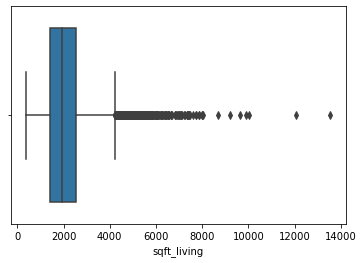

In [25]:
ax = sns.boxplot(x = df["sqft_living"])

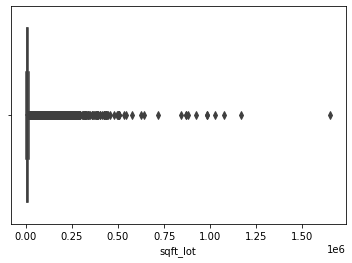

In [26]:
ax = sns.boxplot(x = df["sqft_lot"])

### Check for multicollinearity 

depending on the model chosen, multicollinearity can impact the accuracy of the model algoritm by giving too much importance to similar features. Reduce this risk by creating the correlation matrix, consider dropping any one of two very similar numerical features, judging by their correlation score (spearmans or pearsons) 

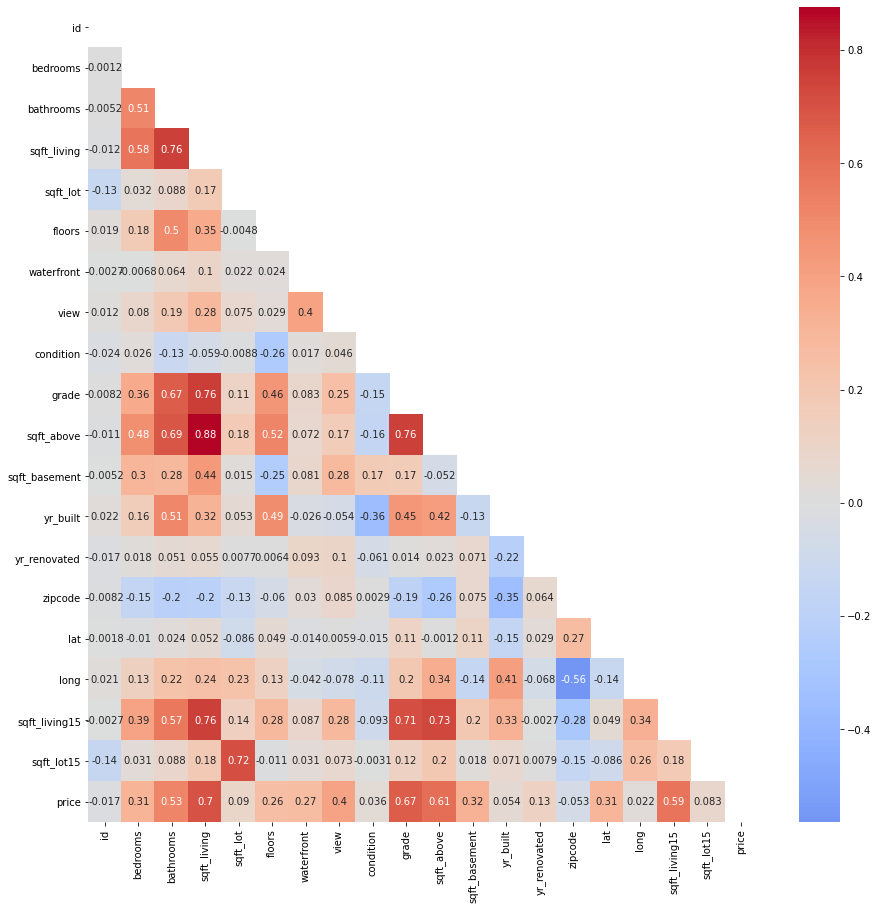

In [27]:
fig, ax = plt.subplots(figsize = (15,15))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask = mask, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

### Clean and wrangling steps 

#### List here any cleaning or wrangling steps to return to on a second iteration of your model 


+ Create new column for month
+ Drop columns id, date, sqft_above, lat and long
+ Drop row incl. 33 bedrooms
+ 
+ 
+ 

In [28]:
# Creating new column for month
df["month"] = pd.DatetimeIndex(df["date"]).month
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,10
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,12
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,12
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2


In [29]:
# Dropping row with 33 bedrooms
df = df.drop(df[df["bedrooms"] == 33].index)

In [30]:
# Dropping columns
df_1 = df.drop(["id", "date", "sqft_above"], axis = 1)
df_1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month
0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,10
1,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,12
2,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2
3,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,12
4,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2


### split off the dependant variable (label)

In [31]:
X = df_1.drop(columns = ["price"]) # X is all other columns
y = df_1["price"] # y is price

In [32]:
# Check that X.shape and y.shape have the same number of rows
X.shape

(21596, 18)

In [33]:
y.shape

(21596,)

# Pre-processing - Iteration 1 

+ the minimum requirements here depend on the model chosen. ie, for linear regression you must label / encode any categorical (object type) columns, nulls must also have been eliminated at this stage - as the model only works with numbers. 

at this stage it is possible to proceed to your baseline (worst case) model

---- 
OR 

+ you can consider applying a scaling method for the numerical features
+ this is best applied after dealing with any extreme outlier values



In [34]:
# OHE (One Hot Encoder), get_dummies, labelling method - to replace any categories with numbers

### import the chosen model 

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [37]:
ln = LinearRegression()

### train test split - select a % test data set and set your random seed 

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

### apply model and train model 

In [40]:
model = ln.fit(X_train,y_train)

In [41]:
y_pred = ln.predict(X_test)

In [42]:
y_pred

array([ 177817.48134088,  461880.54893471, 1358942.80258275, ...,
        522542.56475079,  331154.87949348,  440584.46208791])

### evaluate accuracy against test dataset  

In [43]:
r2_score(y_test, y_pred)

0.7137111002535681

In [44]:
mean_absolute_error(y_test, y_pred)
# shows how far away we are from predicting the correct values (in Dollars)

122500.96637876093

#### next steps

+ Consider the accuracy of predictions, especially the Rsquared and MAE (Mean Absolute Error - which in this case describes in dollars, how far away from predicting an accurate house price your model is)

+ also think about - is there anything I could return to to improve my model accuracy?? 

# Pre-processing - Iteration 2

It is best to attempt at least two more experimental rounds of pre processing in order to run the models and compare the results. This time, you could be more selective in your features, do more feature engineering or data wrangling, use a different method for imputing nulls/ dealing with outliers, apply a couple of different scaling method to numerical columns to normalise their distribution or convert numerical features to categories in a logical way 

In [45]:
# Creating new boolean column for renovated
df["renovated"] = df["yr_renovated"].apply(lambda x: 0 if x == 0 else 1)

In [46]:
# Creating new boolean for upscale_neighborhood
df["upscale_neighborhood"] = (df["zipcode"].isin(
    [98039, 98004, 98040, 98112, 98102, 98105, 98109, 98119, 98005, 98033])).astype(int)

In [47]:
# Creating new boolean for upscale_neighborhood
# df["basement"] = df["sqft_basement"].apply(lambda x: 0 if x == 0 else 1)

In [48]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,renovated,upscale_neighborhood
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,221900,10,0,0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,538000,12,1,0
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,180000,2,0,0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,604000,12,0,0
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,510000,2,0,0


In [49]:
df_1 = df.drop(["id", "date", "sqft_above", "yr_renovated", "sqft_living15"], axis = 1)

In [50]:
#df_2.hist(figsize = (18,15), bins = "auto");

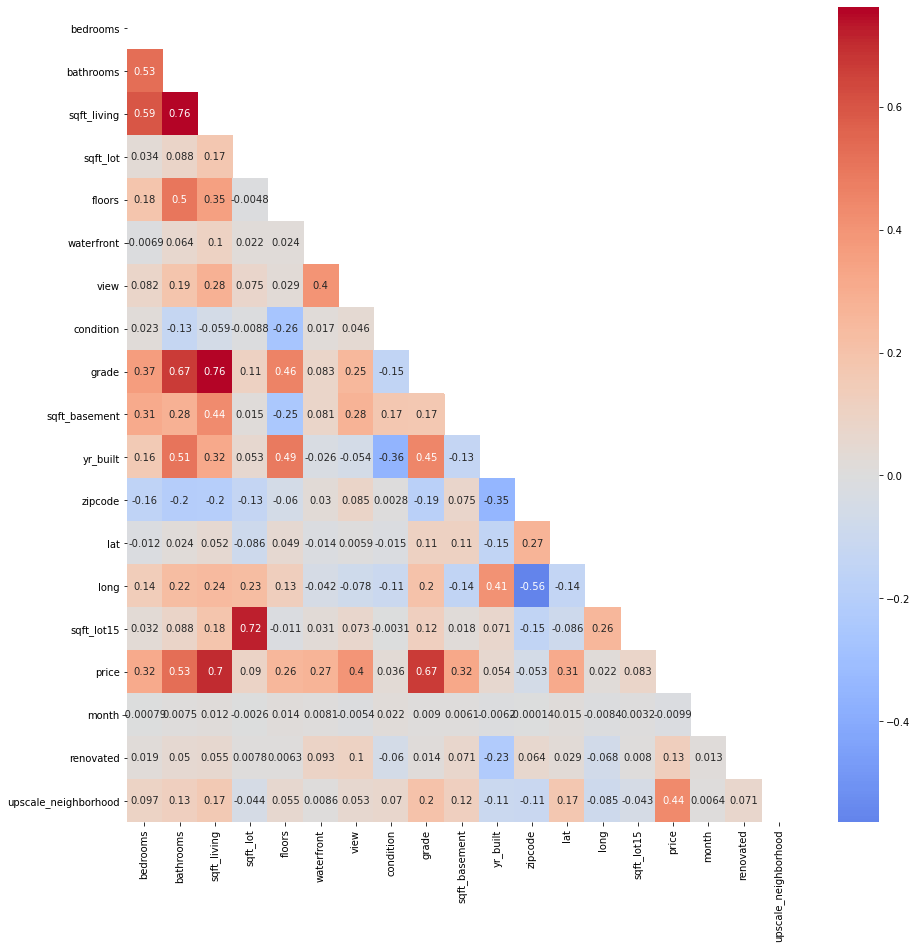

In [51]:
fig, ax = plt.subplots(figsize = (15,15))
mask = np.zeros_like(df_1.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_1.corr(), mask = mask, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

In [52]:
X = df_1.drop(columns = ["price"]) # X is all other columns
y = df_1["price"] # y is price

### train test split - select a % test data set and set your random seed 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

### apply model and train model 

In [54]:
model = ln.fit(X_train,y_train)

In [55]:
y_pred = ln.predict(X_test)

In [56]:
y_pred

array([ 186437.9105099 ,  433410.72958405, 1293799.22571819, ...,
        471036.59296152,  344642.88791208,  365498.73570462])

### evaluate accuracy against test dataset  

In [57]:
r2_score(y_test, y_pred)

0.7644177464395497

In [58]:
mean_absolute_error(y_test, y_pred)

111477.1577092498

# Pre-processing - Iteration 3

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    21596 non-null  int64         
 1   date                  21596 non-null  datetime64[ns]
 2   bedrooms              21596 non-null  int64         
 3   bathrooms             21596 non-null  float64       
 4   sqft_living           21596 non-null  int64         
 5   sqft_lot              21596 non-null  int64         
 6   floors                21596 non-null  float64       
 7   waterfront            21596 non-null  int64         
 8   view                  21596 non-null  int64         
 9   condition             21596 non-null  int64         
 10  grade                 21596 non-null  int64         
 11  sqft_above            21596 non-null  int64         
 12  sqft_basement         21596 non-null  int64         
 13  yr_built        

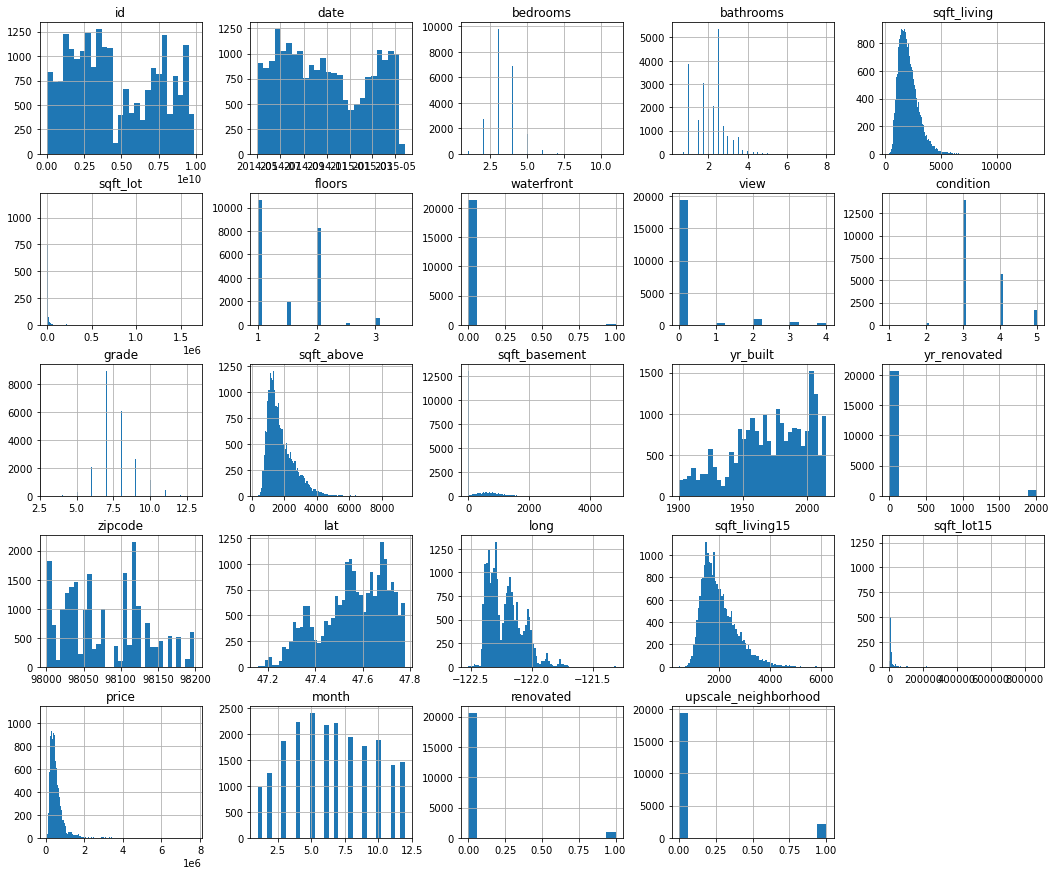

In [60]:
df.hist(figsize = (18,15), bins = "auto");

In [61]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

In [62]:
df["sqft_living_log"] = list(map(log_transform_clean, df["sqft_living"]))
df["sqft_lot_log"] = list(map(log_transform_clean, df["sqft_lot"]))
df["bedrooms_log"] = list(map(log_transform_clean, df["bedrooms"]))
df["bathrooms_log"] = list(map(log_transform_clean, df["bathrooms"]))
df["sqft_lot15_log"] = list(map(log_transform_clean, df["sqft_lot15"]))
df["yr_built_log"] = list(map(log_transform_clean, df["yr_built"]))

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    21596 non-null  int64         
 1   date                  21596 non-null  datetime64[ns]
 2   bedrooms              21596 non-null  int64         
 3   bathrooms             21596 non-null  float64       
 4   sqft_living           21596 non-null  int64         
 5   sqft_lot              21596 non-null  int64         
 6   floors                21596 non-null  float64       
 7   waterfront            21596 non-null  int64         
 8   view                  21596 non-null  int64         
 9   condition             21596 non-null  int64         
 10  grade                 21596 non-null  int64         
 11  sqft_above            21596 non-null  int64         
 12  sqft_basement         21596 non-null  int64         
 13  yr_built        

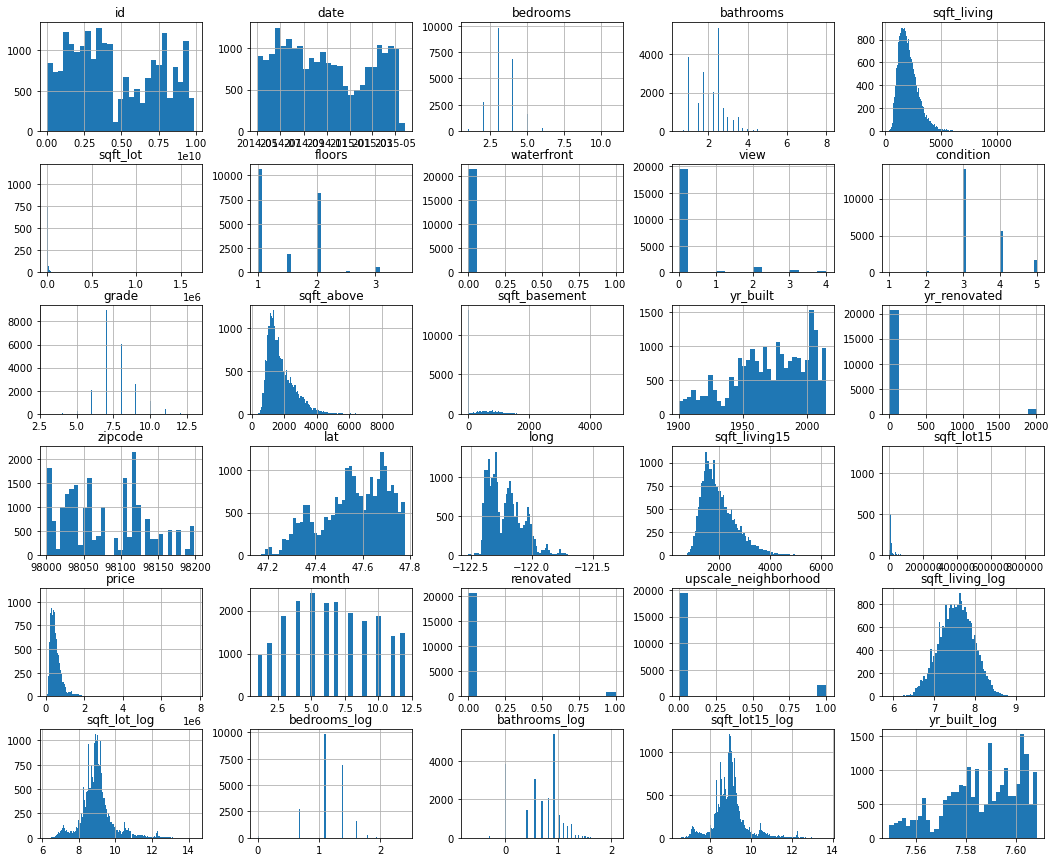

In [64]:
df.hist(figsize = (18,15), bins = "auto");

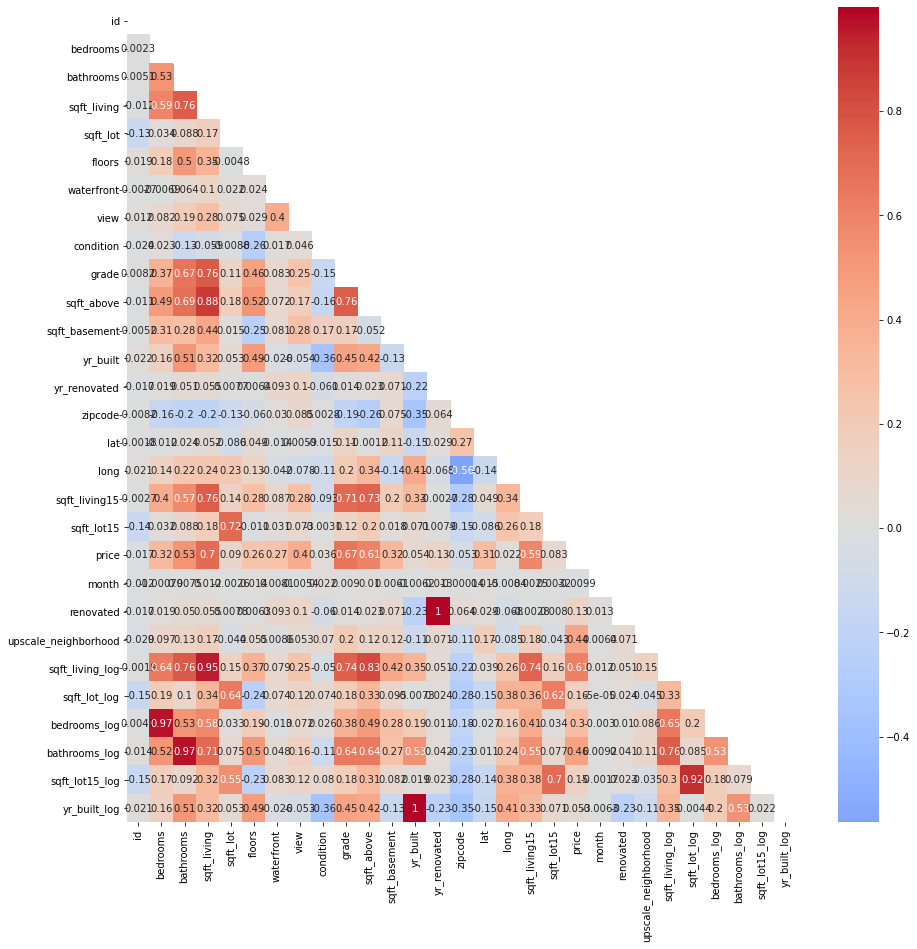

In [65]:
fig, ax = plt.subplots(figsize = (15,15))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask = mask, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

In [66]:
df_1 = df.drop(["id", "date", "sqft_above", "yr_renovated", "sqft_living15", "bedrooms_log",
               "bathrooms_log", "sqft_living", "sqft_lot", "sqft_lot15", "yr_built_log"], axis=1)

In [67]:
df_1.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,price,month,renovated,upscale_neighborhood,sqft_living_log,sqft_lot_log,sqft_lot15_log
0,3,1.00,1.0,0,0,3,7,0,1955,98178,47.5112,-122.257,221900,10,0,0,7.073270,8.639411,8.639411
1,3,2.25,2.0,0,0,3,7,400,1951,98125,47.7210,-122.319,538000,12,1,0,7.851661,8.887653,8.941022
2,2,1.00,1.0,0,0,3,6,0,1933,98028,47.7379,-122.233,180000,2,0,0,6.646391,9.210340,8.994917
3,4,3.00,1.0,0,0,5,7,910,1965,98136,47.5208,-122.393,604000,12,0,0,7.580700,8.517193,8.517193
4,3,2.00,1.0,0,0,3,8,0,1987,98074,47.6168,-122.045,510000,2,0,0,7.426549,8.997147,8.923058


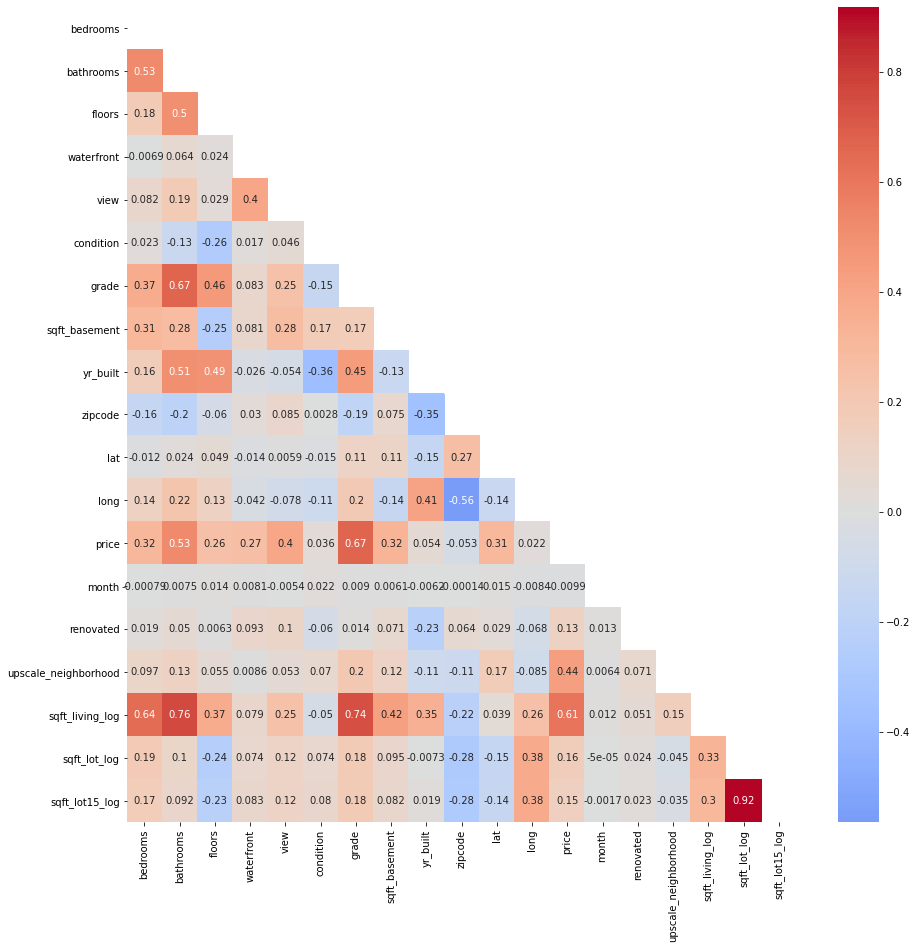

In [68]:
fig, ax = plt.subplots(figsize = (15,15))
mask = np.zeros_like(df_1.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_1.corr(), mask = mask, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

In [69]:
df_1 = df_1.drop(["sqft_lot15_log"], axis=1)

In [70]:
df_1.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,price,month,renovated,upscale_neighborhood,sqft_living_log,sqft_lot_log
0,3,1.00,1.0,0,0,3,7,0,1955,98178,47.5112,-122.257,221900,10,0,0,7.073270,8.639411
1,3,2.25,2.0,0,0,3,7,400,1951,98125,47.7210,-122.319,538000,12,1,0,7.851661,8.887653
2,2,1.00,1.0,0,0,3,6,0,1933,98028,47.7379,-122.233,180000,2,0,0,6.646391,9.210340
3,4,3.00,1.0,0,0,5,7,910,1965,98136,47.5208,-122.393,604000,12,0,0,7.580700,8.517193
4,3,2.00,1.0,0,0,3,8,0,1987,98074,47.6168,-122.045,510000,2,0,0,7.426549,8.997147


In [71]:
X = df_1.drop(columns = ["price"]) # X is all other columns
y = df_1["price"] # y is price

### train test split - select a % test data set and set your random seed 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

### apply model and train model 

In [73]:
model = ln.fit(X_train,y_train)

In [74]:
y_pred = ln.predict(X_test)

In [75]:
y_pred

array([ 146363.73848866,  400681.46257606, 1010972.04684742, ...,
        456419.21009559,  325142.86165226,  440855.951498  ])

### evaluate accuracy against test dataset  

In [76]:
r2_score(y_test, y_pred)

0.7210570567908468

In [77]:
mean_absolute_error(y_test, y_pred)

118253.25283374969